In [1]:
import geopandas as gpd
import numpy as np
import multiprocessing as mp
import osmnx as ox
%matplotlib inline
ox.__version__

'0.16.1'

# Routing, Speed Imputation and Travel Times!

In [2]:
location = 'Vancouver'
G = ox.graph_from_place(location, network_type='drive')

## 1) Nearest node/edge search with OSMnx

In [3]:

# convert projected graph to edges geodataframe
gdf_edges = ox.graph_to_gdfs(ox.project_graph(G), nodes=False)

# list of lats and lngs
lngs = gdf_edges.head().centroid.map(lambda x: x.coords[0][0])
lats = gdf_edges.head().centroid.map(lambda x: x.coords[0][1])

# the lat, lng at the spatial center of the graph
lng, lat = gdf_edges.unary_union.centroid.coords[0]
center_point = lat, lng

# find the nearest node to some point
center_node = ox.get_nearest_node(G, center_point)

# find the nearest nodes to a set of points
# optionally specify `method` use use a kdtree or balltree index
nearest_nodes = ox.get_nearest_nodes(G, lngs, lats, method='kdtree')

# find the nearest edge to some point
nearest_edge = ox.get_nearest_edge(G, center_point)

# find the nearest edges to some set of points
# optionally specify `method` use use a kdtree or balltree index
nearest_edges = ox.get_nearest_edges(G, lngs, lats)

In [4]:
print(f'Center point: {center_point}')
print(f'Center node: {center_node}')
print(f'Nearest nodes: {nearest_nodes}')


Center point: (5455162.49424239, 492279.0027341878)
Center node: 4695327907
Nearest nodes: [4695327907 4695327907 4695327907 4695327907 4695327907]


## 2) Basic Routing by Distance

Num of nodes: 7436


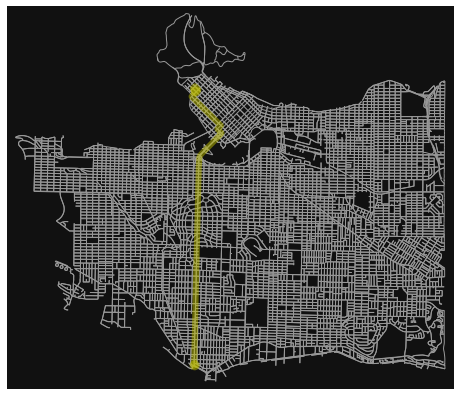

In [6]:
print(f'Num of nodes: {len(list(G))}')
orig, dest = list(G)[0], list(G)[len(list(G))-1]
route = ox.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_color='y', route_linewidth=6, node_size=0)

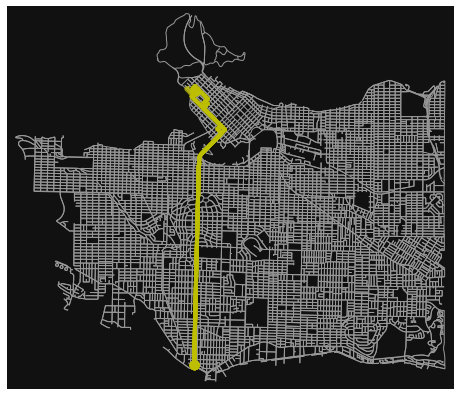

In [7]:
# Get k shortest paths
routes = ox.k_shortest_paths(G, orig, dest, k=15, weight='length')
fig, ax = ox.plot_graph_routes(G, list(routes), route_colors='y', route_linewidth=4, node_size=0)


## Get closest node to query. 